### Machine Learning for predict the Advertising 

In [9]:
# import important liabry 
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# url='http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv'
url='https://github.com/prasertcbs/basic-dataset/raw/master/ISLR/Advertising.csv'
# df=pd.read_csv(url, index_col=0)
df=pd.read_csv(url, usecols=[1, 2, 3, 4])
# df=pd.read_csv(url, usecols=list(range(1, 5)))
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# see the information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# checking the missing value 
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Text(0.5, 1.0, 'Sales TV')

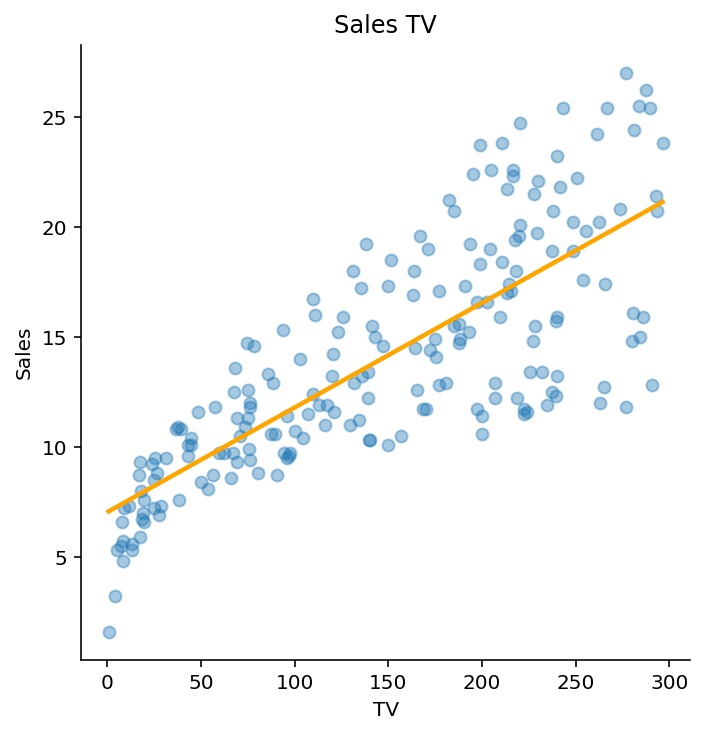

In [10]:
sns.lmplot(x='TV', y='Sales', data=df , ci=None,
          scatter_kws={'alpha':0.4},
          line_kws={'color':'orange'}) 
plt.title('Sales TV')

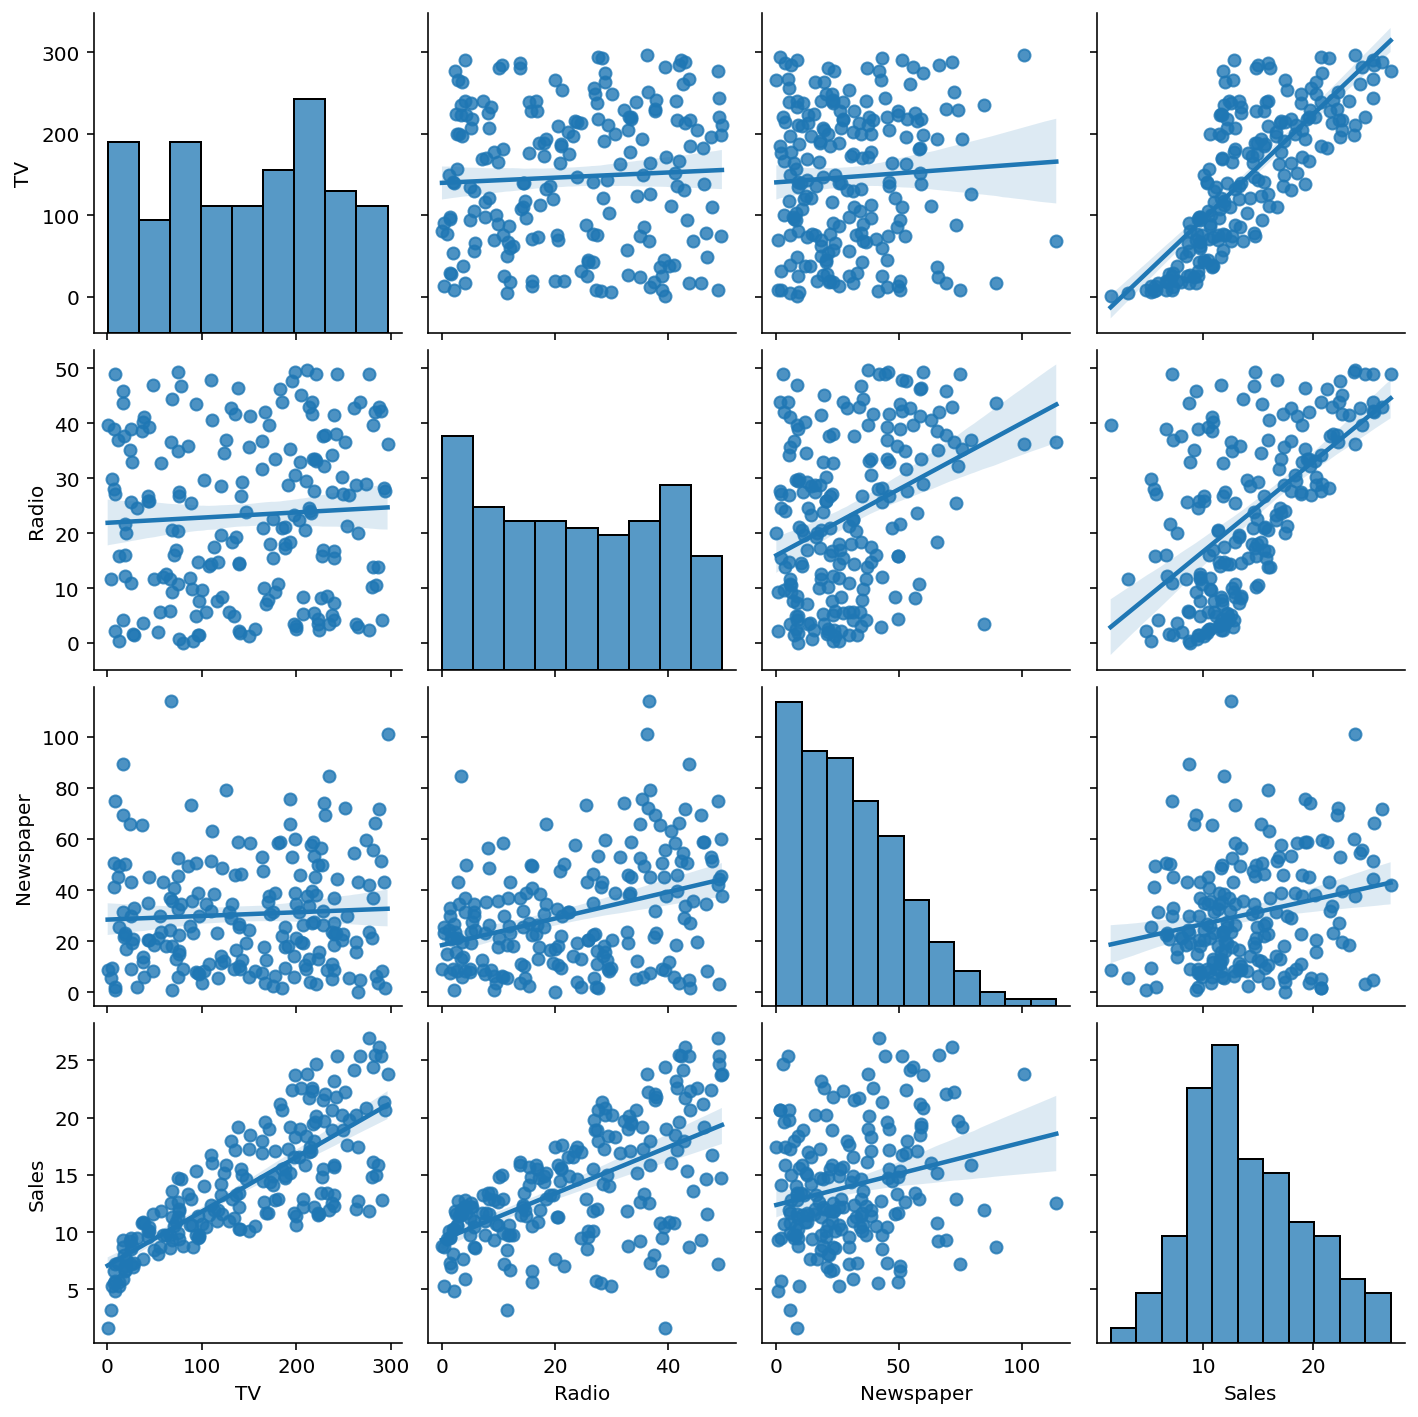

In [9]:
sns.pairplot(df, kind='reg');

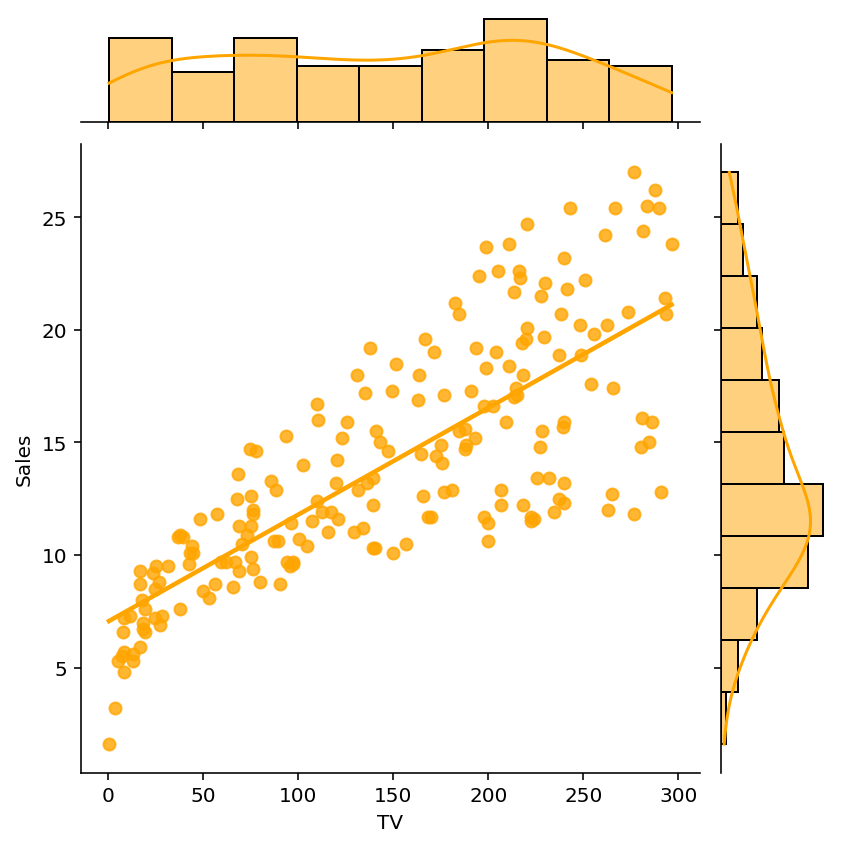

In [14]:
# Befor Run Linear Regrsession should explore the data first see the pattern 
sns.jointplot(x='TV' , y='Sales', data=df, kind='reg', ci=None,
            color='orange')

### SKlearn : Linear Regresssion

In [15]:
import sklearn
from sklearn.linear_model import LinearRegression

In [16]:
model= LinearRegression()
model

LinearRegression()

In [17]:
len(df)

200

In [18]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

### Create the train model 

In [35]:
# split train the model 
x=df.drop(columns=['Sales'])[:140]
y=df['Sales'][:140]

In [20]:
len(x)

140

In [21]:
# x is stand for independent variable 
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [22]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [25]:
model.fit(x, y)

LinearRegression()

In [27]:
# Run-R square 
model.score(x,y)

0.8937102367013778

In [28]:
model.intercept_

3.0451422090371185

-The intercept of this model is 3.04 

In [29]:
x.head(3)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3


In [32]:
# Run the coef of X
model.coef_

array([ 0.04704868,  0.17968299, -0.00300557])

###### Predict the sales 
- if we paid spend budget for TV 200 , how many revenue ?
- if we paid spend budget for Radio 40 , how many revenue ?
- if we paid spend budget for Newspaper 70 , How many revenue ? 

In [33]:
# Predict the advertising 
model.predict([[200,40,70]])

C:\Users\s00943\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.43180837])

Result 
  - we wil gain the sales around 19.43$

In [34]:
# predict the advertising for multiple 
model.predict([[200, 40, 70],
               [100, 80, 50],
               [40, 20, 10]])

C:\Users\s00943\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.43180837, 21.97437115,  8.49069357])


we can input the number of prediction in the model by each scenario  
- senario 1 : sales is 19.43 dollor 
- senario 2 : sales is 21.97 dollor
- senario 3 : sales is 8.49  dollor

#### Create the test model 

In [50]:
# create the x test model 
x_test =df.drop(columns=['Sales'])[140:]
x_test.head()

,TV,Radio,Newspaper
140,73.4,17.0,12.9
141,193.7,35.4,75.6
142,220.5,33.2,37.9
143,104.6,5.7,34.4
144,96.2,14.8,38.9


In [39]:
y_hat=model.predict(x_test)
y_hat

array([ 9.5143544 , 18.29202877, 19.27094064,  8.88723582, 10.11361706,
        9.96041972, 15.62706788, 23.1587013 , 12.03845031,  9.72212471,
       18.63809455, 10.10099867, 16.48589616, 18.12468609, 15.64364266,
        5.30523275, 15.12744231, 10.25358725, 10.09006252, 12.44362791,
       14.3210309 , 13.3616908 , 15.08443331, 17.32769433, 11.18435749,
       14.4341081 , 10.57847377, 13.65085298, 17.24682604, 18.30648623,
        7.42659652, 14.39756088,  7.52782982, 12.20541805, 14.08031808,
       24.73378746, 20.09744782, 12.3485591 , 16.40555117, 12.5803357 ,
       10.85519521, 14.21321462,  6.62420582, 24.08691176, 18.72317811,
       20.7349155 ,  9.90581943, 17.13834561, 18.98753788,  6.02878648,
       12.27110367,  8.5198605 ,  4.49610391, 18.42872767, 16.46701074,
        5.46575208,  8.33322951, 13.02457489, 23.73586521, 15.48426632])

In [49]:
# create the dataframe afrer we get the result of prediction as array for set the format easily 
FC= pd.concat([df[140:].reset_index(), pd.Series(y_hat, name='predicted')], axis='columns')
FC.head()

,index,TV,Radio,Newspaper,Sales,predicted
0,140,73.4,17.0,12.9,10.9,9.514354
1,141,193.7,35.4,75.6,19.2,18.292029
2,142,220.5,33.2,37.9,20.1,19.270941
3,143,104.6,5.7,34.4,10.4,8.887236
4,144,96.2,14.8,38.9,11.4,10.113617


# Statsmodels: Multiple Linear Regression 


In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [53]:
# formula: response ~ predictor1 + predictor2
model_a = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df[:140]).fit()
# model_a = smf.ols(formula='Sales ~ TV + Radio', data=df).fit()

In [54]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     381.2
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           5.60e-66
Time:                        08:35:26   Log-Likelihood:                -273.89
No. Observations:                 140   AIC:                             555.8
Df Residuals:                     136   BIC:                             567.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0451      0.391      7.782      0.0

In [55]:
model_a.params 

Intercept    3.045142
TV           0.047049
Radio        0.179683
Newspaper   -0.003006
dtype: float64

In [56]:
model_a.pvalues

Intercept    1.608608e-12
TV           1.091697e-57
Radio        1.161068e-34
Newspaper    6.689820e-01
dtype: float64

Other Example 

In [1]:
# install Linear Regression mule from Sciket-learn in the program 
from sklearn.linear_model import LinearRegression

In [3]:
# detemine the variable X & Y by sciket -learn 
x=[[450],[600],[750],[500],[650],[1000]]  # Advertisint 
y=[[1200],[1500],[2000],[1400],[1550],[3500]]  # Sales 

In [4]:
# Start to create the model for prediction as Linear Regression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [5]:
#if we need to know if we spend buget in advertising 1500 baht , How many sales we will get ? 
predict_sale = model.predict([[1500]])

p= predict_sale[0]
display(p)

array([5305.07399577])